In [1]:
import numpy as np
import csv
import itertools
import matplotlib
%matplotlib inline
import seaborn as sb
from matplotlib import pyplot as plt
import datetime
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters


/Users/n/.pyenv/versions/3.7.2/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import sys

In [3]:
sys.executable


'/Users/n/.pyenv/versions/3.7.2/bin/python3'

In [4]:
def Float(x):
    try:
        rtn = float(x)
    except:
        rtn = float('NaN')
    return rtn


## OWID data

In [5]:
owid_file = '../covid-19-owid/public/data/owid-covid-data.csv'
dat = []
with open(owid_file,'r',newline='') as fp:
    myreader = csv.DictReader(fp,delimiter=',')
#    rows = list(itertools.islice(myreader,4))
    for row in myreader:
        dat.append(row)
    
        

In [6]:
dat[0].keys()

odict_keys(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cvd_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy'])

In [12]:
foo = [x for x in dat if x['iso_code']=='USA'][0]

In [16]:
fofo = foo['new_deaths']

In [22]:
foo['new_deaths']

'0.0'

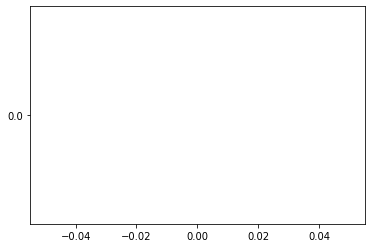

In [17]:
plt.plot(fofo)

In [ ]:
dates = set([dd['date'] for dd in dat])
len(dates)

In [ ]:
set([(d['iso_code'],d['location']) for d in dat])

In [ ]:
countries = list(set([dd['iso_code'] for dd in dat]))

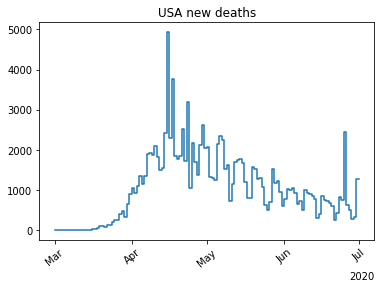

In [39]:
deathUSA = [(dd['date'],dd['new_deaths']) for dd in dat if dd['iso_code']=='USA']

fmt = '%Y-%m-%d'
xx = [datetime.datetime.strptime(dd[0],fmt) for dd in deathUSA if int(Float(dd[1]))>0 ]
yy = [int(Float(dd[1])) for dd in deathUSA if int(Float(dd[1]))>0 ]

locator = mdates.MonthLocator()
formatter= mdates.ConciseDateFormatter(locator)

fig,ax = plt.subplots(1,1)
ax.step(xx,yy)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)
for tick in ax.get_xticklabels():
    tick.set_rotation(40)
plt.title('USA new deaths')
plt.show()

In [34]:
int(Float('0.0'))

0

In [24]:
def plotTarget(iso,targ='new_deaths'):
    datt = [(dd['date'],dd[targ]) for dd in dat if dd['iso_code']==iso]
    deathstr = 'death'+iso
    fmt = '%Y-%m-%d'
    
    start=False
    xx = [] ; yy = []
    for i in range(len(datt)):
        dd = datt[i]
        if float(dd[1]) == 0:
            if start==False:
                continue
            else:
                pass
        else:
            if start==False:
                start=True
        if start:
            xx.append(datetime.datetime.strptime(dd[0],fmt))
            yy.append(float(dd[1]))
        
#    xx = [datetime.datetime.strptime(dd[0],fmt) for dd in datt if float(dd[1])>0 ]
#    yy = [float(dd[1]) for dd in datt if int(dd[1])>0 ]

    locator = mdates.MonthLocator()
    formatter= mdates.ConciseDateFormatter(locator)

    register_matplotlib_converters() # pandas made me do it
    fig,ax = plt.subplots(1,1)
    ax.step(xx,yy)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(locator)
    for tick in ax.get_xticklabels():
        tick.set_rotation(40)
        plt.title(iso+' '+targ)
    plt.show()

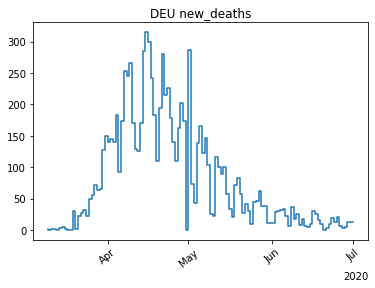

In [25]:
plotTarget('DEU')

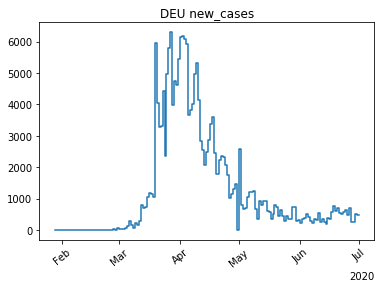

In [26]:
plotTarget('DEU','new_cases')

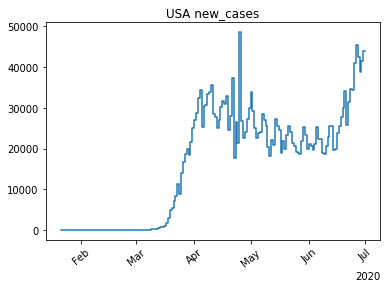

In [27]:
plotTarget('USA','new_cases')

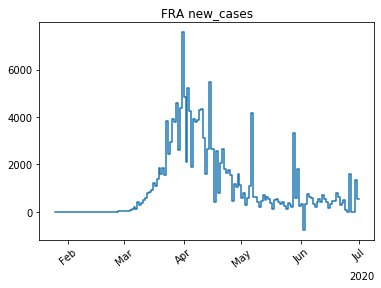

In [28]:
plotTarget('FRA','new_cases')

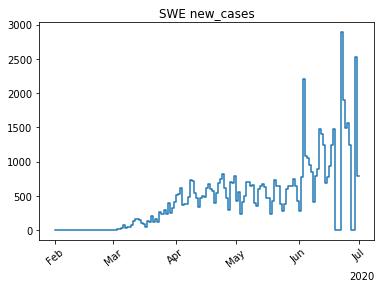

In [29]:
plotTarget('SWE','new_cases')

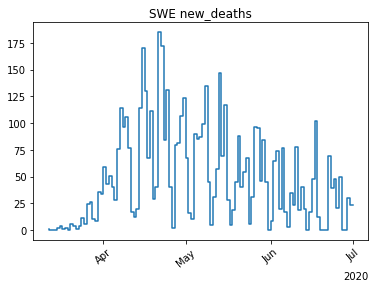

In [30]:
plotTarget('SWE','new_deaths')

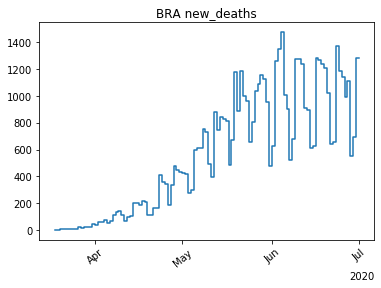

In [31]:
plotTarget('BRA','new_deaths')

## Oxford data

In [40]:
owid_file = '../covid-policy-tracker/data/OxCGRT_latest.csv'
oxdat = []
with open(owid_file,'r',newline='') as fp:
    myreader = csv.DictReader(fp,delimiter=',')
#    rows = list(itertools.islice(myreader,4))
    for row in myreader:
        oxdat.append(row)
    

In [41]:
oxdat[0].keys()

odict_keys(['CountryName', 'CountryCode', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag', 'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag', 'C7_Restrictions on internal movement', 'C7_Flag', 'C8_International travel controls', 'E1_Income support', 'E1_Flag', 'E2_Debt/contract relief', 'E3_Fiscal measures', 'E4_International support', 'H1_Public information campaigns', 'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing', 'H4_Emergency investment in healthcare', 'H5_Investment in vaccines', 'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex', 'StringencyIndexForDisplay', 'StringencyLegacyIndex', 'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex', 'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex', 'ContainmentHealthIndexForDisplay', 'EconomicSupportIndex', 'EconomicSupportIndexForDisplay'])

In [42]:
countries = list(set([(dd['CountryName'],dd['CountryCode']) for dd in oxdat]))

In [43]:
[countries[i] for i in range(10)]

[('Democratic Republic of Congo', 'COD'),
 ('Singapore', 'SGP'),
 ('Chile', 'CHL'),
 ('Tanzania', 'TZA'),
 ('Burkina Faso', 'BFA'),
 ('Malaysia', 'MYS'),
 ('Lithuania', 'LTU'),
 ('Japan', 'JPN'),
 ('Poland', 'POL'),
 ('Finland', 'FIN')]

In [44]:
foo = [(dd['Date'],dd['C1_School closing'],dd['C1_Flag']) for dd in oxdat if dd['CountryCode']=='USA']

In [45]:
xx = [foo[i] for i in range(10)]

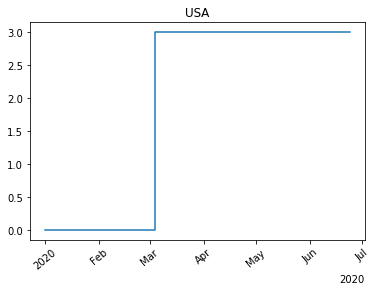

In [46]:
foo = [(dd['Date'],dd['C1_School closing'],dd['C1_Flag']) 
       for dd in oxdat if dd['CountryCode']=='USA']

fmt = '%Y%m%d'
xx = [datetime.datetime.strptime(dd[0],fmt) for dd in foo]
yy = []
for dd in foo:
    try:
        yy.append(float(dd[1]))
    except:
        yy.append(float('NaN'))


locator = mdates.MonthLocator()
formatter= mdates.ConciseDateFormatter(locator)

fig,ax = plt.subplots(1,1)
ax.step(xx,yy)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)
for tick in ax.get_xticklabels():
    tick.set_rotation(40)
plt.title('USA')
plt.show()

Note:  no wildcard data:

In [47]:
foo = [(dd['Date'],dd['CountryCode'],dd['M1_Wildcard']) 
       for dd in oxdat if dd['M1_Wildcard'] != '']



In [48]:
foo


[]

Notes:  
* first version of `datcodes` leaves out all flags (general vs. targeted implementation)
* 2nd version leaves out all variables measured in dollars

In [49]:
datcodes = ['C1_School closing', 'C2_Workplace closing', 
            'C3_Cancel public events', 'C4_Restrictions on gatherings', 
            'C5_Close public transport', 'C6_Stay at home requirements', 
            'C7_Restrictions on internal movement', 'C8_International travel controls', 
            'E1_Income support', 'E2_Debt/contract relief', 'E3_Fiscal measures', 
            'E4_International support', 'H1_Public information campaigns', 
            'H2_Testing policy', 'H3_Contact tracing', 
            'H4_Emergency investment in healthcare', 'H5_Investment in vaccines']

datcodes = ['C1_School closing', 'C2_Workplace closing', 
            'C3_Cancel public events', 'C4_Restrictions on gatherings', 
            'C5_Close public transport', 'C6_Stay at home requirements', 
            'C7_Restrictions on internal movement', 'C8_International travel controls', 
            'E1_Income support', 'E2_Debt/contract relief', 
            'H1_Public information campaigns', 
            'H2_Testing policy', 'H3_Contact tracing']



In [50]:
countrycodes = list(set([dd['CountryCode'] for dd in oxdat]))
len(countrycodes)

178

In [51]:
def get_codedat(countrycode='USA'):
    codedat = []
    foo = [[dd['Date']]+ [Float(dd[c]) for c in datcodes]
           for dd in oxdat if dd['CountryCode']==countrycode]
    return foo
    


In [52]:
get_codedat()

[['20200101', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 ['20200102', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 ['20200103', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 ['20200104', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 ['20200105', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 ['20200106', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 ['20200107', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 ['20200108', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 ['20200109', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 ['20200110', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 ['20200111', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 ['20200112', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 ['20200113', 0.0, 0.0, 0.0, 0.0, 0.0, 0

### Response policy maps

* time along x axis 
* NaN same color as max value (typically 4)
* 12 rows for presence of 12 factors.  cf oxford codebook.md in ../covid-policy-tracker/documentation/.

Text(0.5, 1.0, 'DEU')

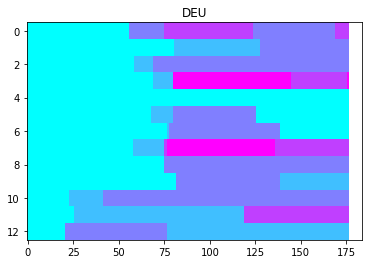

In [55]:
foo = get_codedat('DEU')
foo = [f[1:] for f in foo]
plt.imshow(np.transpose(foo),cmap='cool',aspect='auto');
plt.title('DEU')


Text(0.5, 1.0, 'USA')

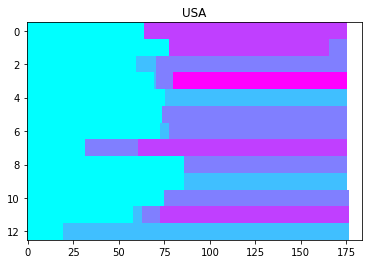

In [56]:
foo = get_codedat('USA')
foo = [f[1:] for f in foo]
plt.imshow(np.transpose(foo),cmap='cool',aspect='auto');
plt.title("USA")

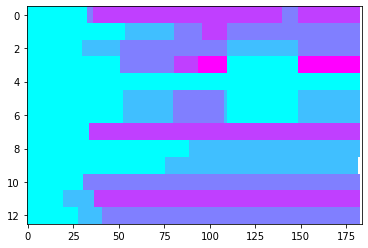

In [57]:
foo = get_codedat('KOR')
foo = [f[1:] for f in foo]
plt.imshow(np.transpose(foo),cmap='cool',aspect='auto');

In [58]:
foo = get_codedat('FRA')
fmt = '%Y%m%d'

locator = mdates.MonthLocator()
formatter= mdates.ConciseDateFormatter(locator)
xx =[datetime.datetime.strptime(dd[0],fmt) for dd in foo]
foo = [f[1:] for f in foo]

register_matplotlib_converters() # pandas made me do it
fig,ax = plt.subplots(1,1)
ax.imshow(np.transpose(foo),cmap='cool',aspect='auto');
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)
for tick in ax.get_xticklabels():
    tick.set_rotation(40)

plt.show()

IndexError: too many indices for array

<Figure size 432x288 with 1 Axes>

### Compare Oxford and OWID data

In [81]:
def plotTargOx(iso,targ='ConfirmedDeaths'):
    datt = [(dd['Date'],dd[targ]) for dd in oxdat if dd['CountryCode']==iso]
    fmt = '%Y%m%d'
    
    start=False
    xx = [] ; yy = []
    last = 0
    for i in range(len(datt)):
        dd = datt[i]
        try:
            foo = float(dd[1])
        except:
            print('problem with ',dd[1])
        if foo == 0:
            if start==False:
                continue
            else:
                pass
        else:
            if start==False:
                start=True
        if start:
            xx.append(datetime.datetime.strptime(dd[0],fmt))
            yy.append(Float(dd[1])-last)
            last = Float(dd[1])
        
#    xx = [datetime.datetime.strptime(dd[0],fmt) for dd in datt if float(dd[1])>0 ]
#    yy = [float(dd[1]) for dd in datt if int(dd[1])>0 ]

    locator = mdates.MonthLocator()
    formatter= mdates.ConciseDateFormatter(locator)

    register_matplotlib_converters() # pandas made me do it
    fig,ax = plt.subplots(1,1)
    ax.step(xx,yy)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(locator)
    for tick in ax.get_xticklabels():
        tick.set_rotation(40)
        plt.title(iso+' '+targ)
    plt.show()

In [82]:
datt = [(dd['Date'],dd['ConfirmedDeaths']) for dd in oxdat if dd['CountryCode']=='DEU']

In [76]:
datt[0]

('20200101', '0')

0.0

In [80]:
[datt[i] for i in range(len(datt))]

[('20200101', '0'),
 ('20200102', '0'),
 ('20200103', '0'),
 ('20200104', '0'),
 ('20200105', '0'),
 ('20200106', '0'),
 ('20200107', '0'),
 ('20200108', '0'),
 ('20200109', '0'),
 ('20200110', '0'),
 ('20200111', '0'),
 ('20200112', '0'),
 ('20200113', '0'),
 ('20200114', '0'),
 ('20200115', '0'),
 ('20200116', '0'),
 ('20200117', '0'),
 ('20200118', '0'),
 ('20200119', '0'),
 ('20200120', '0'),
 ('20200121', '0'),
 ('20200122', '0'),
 ('20200123', '0'),
 ('20200124', '0'),
 ('20200125', '0'),
 ('20200126', '0'),
 ('20200127', '0'),
 ('20200128', '0'),
 ('20200129', '0'),
 ('20200130', '0'),
 ('20200131', '0'),
 ('20200201', '0'),
 ('20200202', '0'),
 ('20200203', '0'),
 ('20200204', '0'),
 ('20200205', '0'),
 ('20200206', '0'),
 ('20200207', '0'),
 ('20200208', '0'),
 ('20200209', '0'),
 ('20200210', '0'),
 ('20200211', '0'),
 ('20200212', '0'),
 ('20200213', '0'),
 ('20200214', '0'),
 ('20200215', '0'),
 ('20200216', '0'),
 ('20200217', '0'),
 ('20200218', '0'),
 ('20200219', '0'),


problem with  


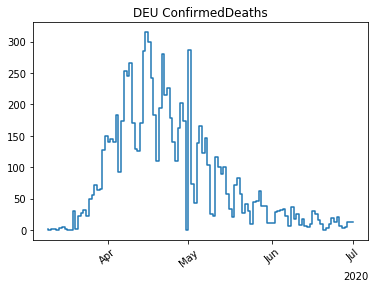

In [83]:
plotTargOx('DEU')

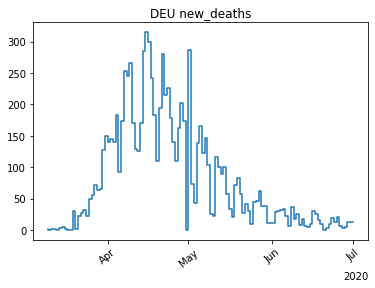

In [84]:
plotTarget('DEU','new_deaths')